Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.69

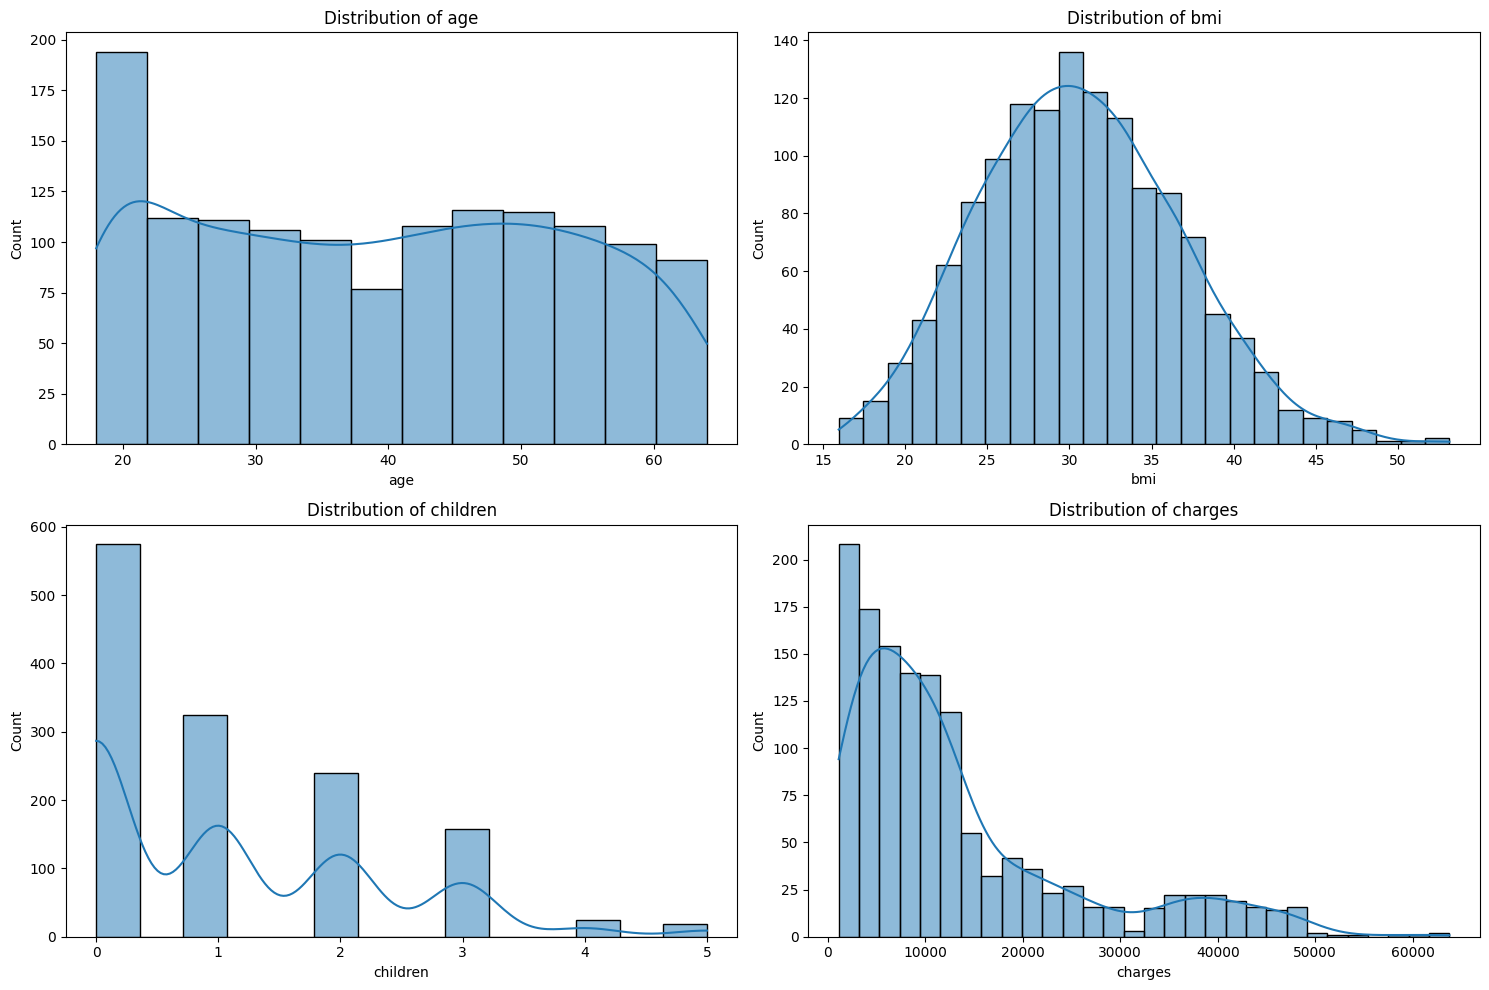

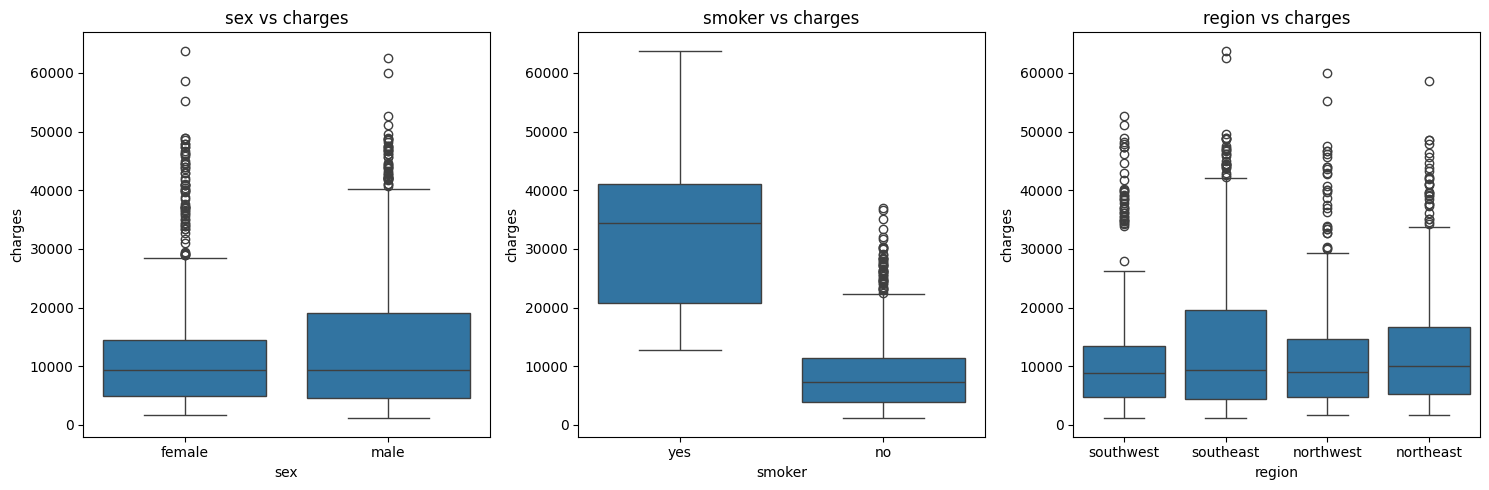

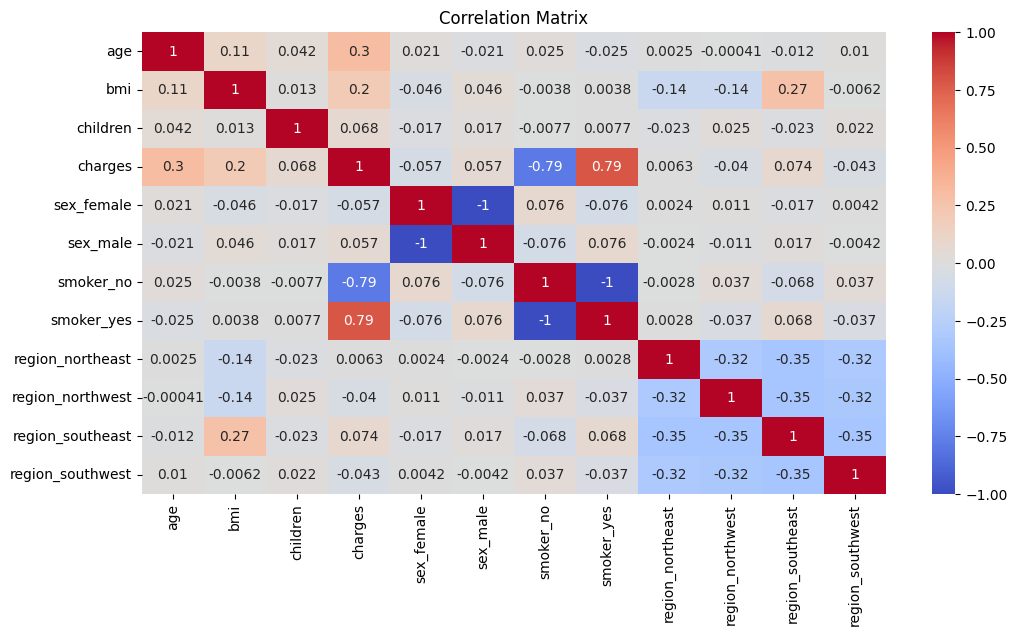


Custom Model Performance:
R2 Score: 0.7835940470117594
RMSE: 5796.270325708828

Model Performances:
Linear Regression:
R2 Score: 0.7835929767120722
RMSE: 5796.284659276275

Ridge Regression:
R2 Score: 0.7835661821408255
RMSE: 5796.6434834789

Linear Regression CV Scores: [0.71585461 0.80210564 0.72296123 0.65784333 0.76678575]
Mean CV Score: 0.7331101109097584

Best Ridge Parameters: {'alpha': 10.0, 'solver': 'svd'}
Best CV Score: 0.7331946849229759

Selected Features (Linear Regression): ['age', 'bmi', 'children', 'smoker_no', 'smoker_yes']
Selected Features (Ridge): ['age', 'bmi', 'children', 'smoker_no', 'smoker_yes']

Final Model Performance:
R2 Score: 0.7809049217290484
RMSE: 5832.172234910083


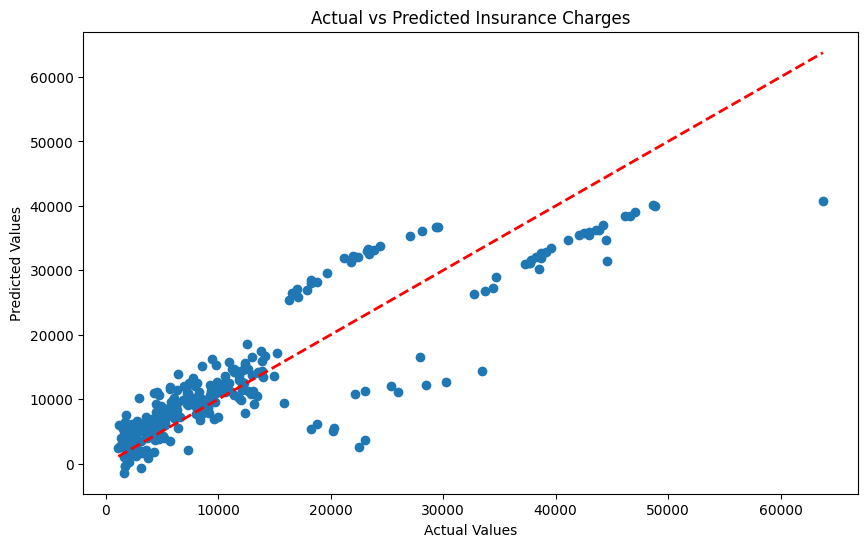


Final Model Comparison:
                                       R2         RMSE
Custom Linear Regression         0.783594  5796.270326
Linear Regression                0.783593  5796.284659
Ridge Regression                 0.783566  5796.643483
Final Ridge (Selected Features)  0.780905  5832.172235


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# 1. Load and explore the data
df = pd.read_csv('/content/insurance.csv')

# Basic EDA
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Enhanced EDA
print("\n=== Enhanced EDA for Insurance Dataset ===")
# Distribution plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for categorical variables
plt.figure(figsize=(15, 5))
categorical_cols = ['sex', 'smoker', 'region']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'{col} vs charges')
plt.tight_layout()
plt.show()

# 2. Data Preprocessing
# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Build Linear Regression from Scratch
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            # Gradient descent
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train custom model
custom_model = CustomLinearRegression()
custom_model.fit(X_train_scaled, y_train)
custom_pred = custom_model.predict(X_test_scaled)
print("\nCustom Model Performance:")
print(f"R2 Score: {r2_score(y_test, custom_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, custom_pred))}")

# 4. Build Two Models for Regression
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Model 2: Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

print("\nModel Performances:")
print("Linear Regression:")
print(f"R2 Score: {r2_score(y_test, lr_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred))}")
print("\nRidge Regression:")
print(f"R2 Score: {r2_score(y_test, ridge_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, ridge_pred))}")

# 5. Hyperparameter Optimization with Cross-validation
# Model 1: Linear Regression with cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print("\nLinear Regression CV Scores:", lr_cv_scores)
print("Mean CV Score:", lr_cv_scores.mean())

# Model 2: Ridge Regression with parameter grid
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky']
}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)
print("\nBest Ridge Parameters:", ridge_grid.best_params_)
print("Best CV Score:", ridge_grid.best_score_)

# 6. Feature Selection
# RFE for Linear Regression RECURSIVE FEAT ELIMINATE (eleminates weak , irrelevent features)
rfe_lr = RFE(estimator=LinearRegression(), n_features_to_select=5)
X_train_lr_selected = rfe_lr.fit_transform(X_train_scaled, y_train)
X_test_lr_selected = rfe_lr.transform(X_test_scaled)
selected_features_lr = X_train.columns[rfe_lr.support_].tolist()
print("\nSelected Features (Linear Regression):", selected_features_lr)

# SelectKBest for Ridge
selector_ridge = SelectKBest(score_func=f_regression, k=5)
X_train_ridge_selected = selector_ridge.fit_transform(X_train_scaled, y_train)
X_test_ridge_selected = selector_ridge.transform(X_test_scaled)
selected_features_ridge = X_train.columns[selector_ridge.get_support()].tolist()
print("Selected Features (Ridge):", selected_features_ridge)

# 7. Final Model with Best Parameters and Features
final_ridge = Ridge(**ridge_grid.best_params_)
final_ridge.fit(X_train_ridge_selected, y_train)
final_pred = final_ridge.predict(X_test_ridge_selected)

print("\nFinal Model Performance:")
print(f"R2 Score: {r2_score(y_test, final_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, final_pred))}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()

# Final comparison of all models
models_comparison = {
    'Custom Linear Regression': {'R2': r2_score(y_test, custom_pred),
                               'RMSE': np.sqrt(mean_squared_error(y_test, custom_pred))},
    'Linear Regression': {'R2': r2_score(y_test, lr_pred),
                         'RMSE': np.sqrt(mean_squared_error(y_test, lr_pred))},
    'Ridge Regression': {'R2': r2_score(y_test, ridge_pred),
                        'RMSE': np.sqrt(mean_squared_error(y_test, ridge_pred))},
    'Final Ridge (Selected Features)': {'R2': r2_score(y_test, final_pred),
                                      'RMSE': np.sqrt(mean_squared_error(y_test, final_pred))}
}

comparison_df = pd.DataFrame(models_comparison).T
print("\nFinal Model Comparison:")
print(comparison_df)